# Regressão

In [ ]:
# @title 1. IMPORTA AS BIBLIOTECAS

import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as mt
from sklearn import preprocessing as pp
from sklearn import linear_model as lm

In [ ]:
# @title 2.0 IMPORTA O ARQUIVO X_training

from google.colab import files
uploaded = files.upload()
Xtraining = pd.read_csv('X_training.csv', sep=',', encoding='utf-8')

Saving X_training.csv to X_training.csv


In [ ]:
Xtraining.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,1.054700e+04,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,1.054700e+04,10547.000000,10547.000000,1.054700e+04,10547.000000,10547.000000
mean,5.995857e-17,0.259502,0.633974,0.645438,0.079089,0.483196,0.180416,2.489291e-16,0.627098,0.100937,-9.499054e-17,0.791581,0.529879
std,1.000047e+00,0.290173,0.156223,0.214348,0.222818,0.327242,0.144705,1.000047e+00,0.483599,0.103352,1.000047e+00,0.060822,0.244461
min,-3.553790e+00,0.000001,0.000000,0.001070,0.000000,0.000000,0.015700,-7.632256e+00,0.000000,0.000000,-4.220028e+00,0.000000,0.000000
25%,-5.810364e-01,0.024600,0.533000,0.512000,0.000000,0.181818,0.092700,-4.243671e-01,0.000000,0.037850,-7.756112e-01,0.800000,0.336000
50%,-1.146491e-01,0.132000,0.645000,0.675000,0.000011,0.454545,0.122000,2.346876e-01,1.000000,0.055200,-3.656695e-02,0.800000,0.532000
75%,4.224443e-01,0.432000,0.748000,0.815000,0.002835,0.727273,0.224000,6.609353e-01,1.000000,0.116000,6.566737e-01,0.800000,0.727000
max,1.969099e+01,0.996000,0.987000,0.999000,0.989000,1.000000,0.984000,2.292930e+00,1.000000,0.941000,4.226719e+00,1.000000,0.982000


In [ ]:
Xtraining.isnull().sum()

,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
audio_mode,0
speechiness,0


array([[<Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

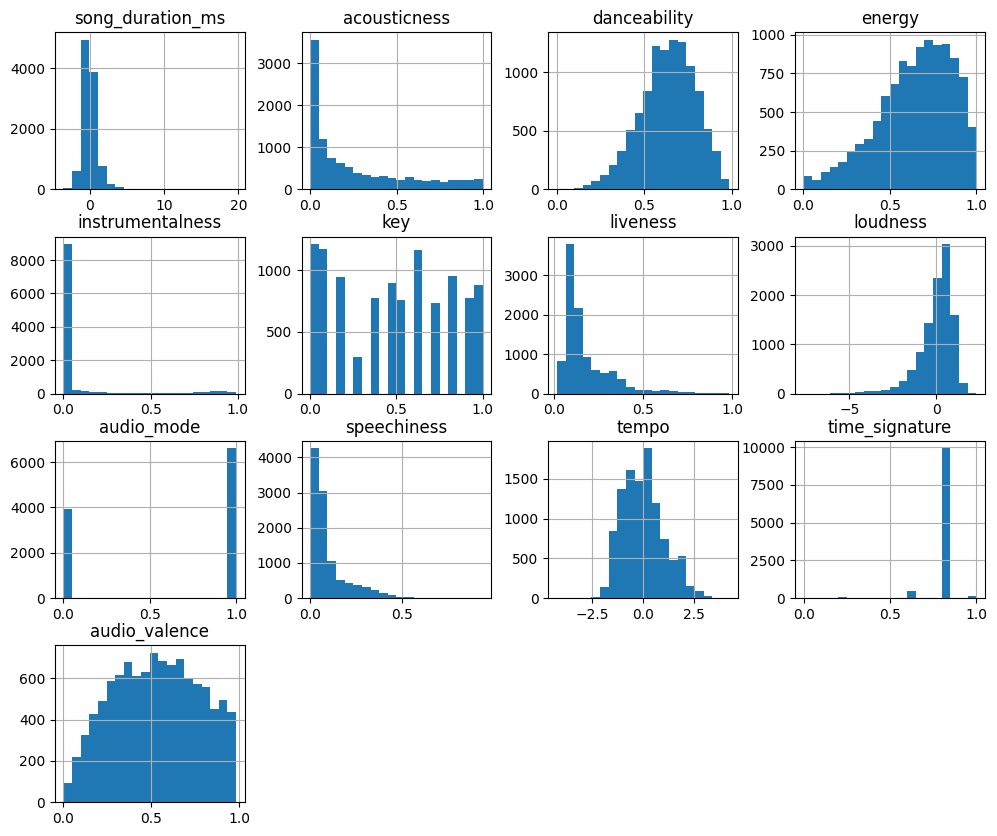

In [ ]:
Xtraining.hist(figsize=(12, 10), bins=20)

Text(0.5, 1.0, 'Matriz de Correlação')

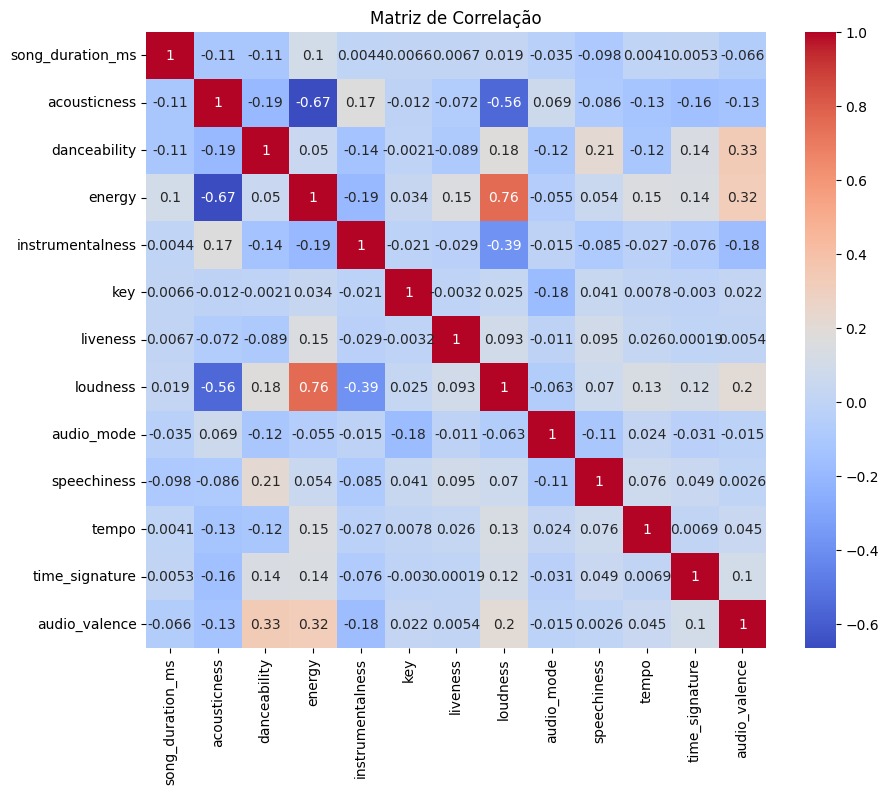

In [ ]:
correlation = Xtraining.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')

In [ ]:
# Análise Multicolinearidade

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(Xtraining.values, i) for i in range(Xtraining.shape[1])]
vif["Feature"] = Xtraining.columns
vif


,VIF,Feature
0,1.053905,song_duration_ms
1,3.137327,acousticness
2,22.598414,danceability
3,32.431047,energy
4,1.414610,instrumentalness
5,3.253873,key
6,2.665658,liveness
7,2.799738,loudness
8,2.796809,audio_mode
9,2.166429,speechiness


<Axes: >

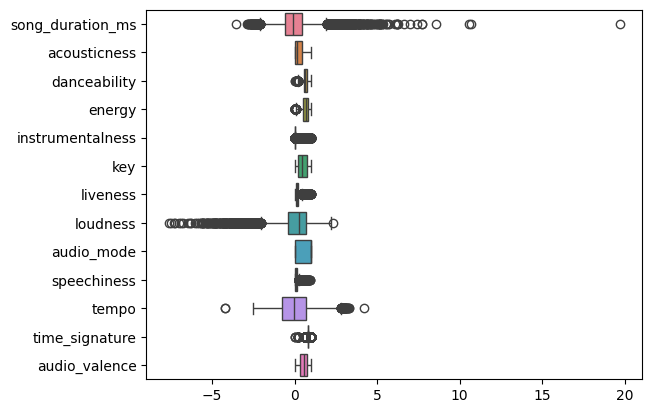

In [ ]:
sns.boxplot(data=Xtraining, orient='h')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtraining_scaled = scaler.fit_transform(Xtraining)


In [ ]:
# @title 2.1 IMPORTA O ARQUIVO y_training

uploaded = files.upload()
ytraining = pd.read_csv('y_training.csv', sep=',', encoding='utf-8')

Saving y_training.csv to y_training.csv


In [ ]:
ytraining.describe()

,song_popularity
count,10547.000000
mean,53.046961
std,21.864535
min,0.100000
25%,40.000000
50%,56.000000
75%,69.000000
max,100.000000


In [ ]:
ytraining.isnull().sum()

,0
song_popularity,0


<Axes: ylabel='Count'>

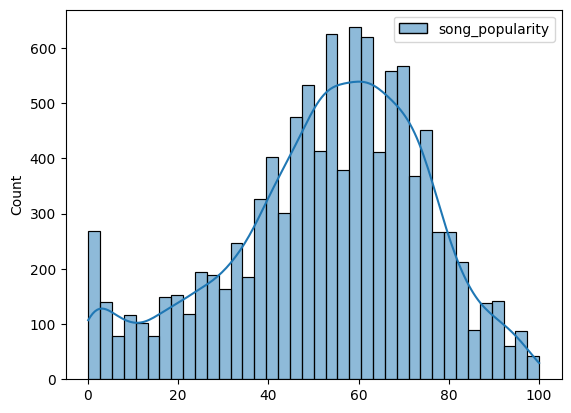

In [ ]:
import seaborn as sns
sns.histplot(ytraining, kde=True)

<Axes: xlabel='song_popularity'>

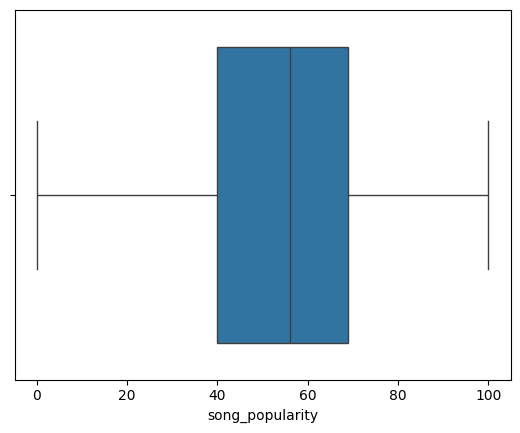

In [ ]:
sns.boxplot(x=ytraining['song_popularity'])

In [ ]:
# @title 2.2 IMPORTA O ARQUIVO X_validation

uploaded = files.upload()
Xvalidation = pd.read_csv('X_validation.csv', sep=',', encoding='utf-8')

Saving X_validation.csv to X_validation.csv


In [ ]:
Xvalidation.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.031180,0.256280,0.633485,0.647265,0.078201,0.477851,0.179284,0.014352,0.635036,0.103951,0.024200,0.792214,0.525134
std,1.056152,0.285704,0.156141,0.213404,0.223037,0.330599,0.143020,0.985424,0.481473,0.106096,1.004350,0.057772,0.246369
min,-3.308429,0.000001,0.068400,0.001070,0.000000,0.000000,0.010900,-7.282915,0.000000,0.022400,-2.595954,0.200000,0.027700
25%,-0.564346,0.025200,0.534000,0.511000,0.000000,0.181818,0.093000,-0.420717,0.000000,0.037800,-0.768134,0.800000,0.332000
50%,-0.088134,0.133000,0.646000,0.675000,0.000010,0.454545,0.123000,0.243551,1.000000,0.056600,-0.036079,0.800000,0.517000
75%,0.476425,0.411000,0.748000,0.819000,0.002270,0.727273,0.220000,0.669799,1.000000,0.124000,0.660282,0.800000,0.726000
max,17.576173,0.996000,0.978000,0.997000,0.997000,1.000000,0.975000,2.356280,1.000000,0.915000,3.174667,1.000000,0.982000


In [ ]:
Xvalidation.isnull().sum()

,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
audio_mode,0
speechiness,0


array([[<Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

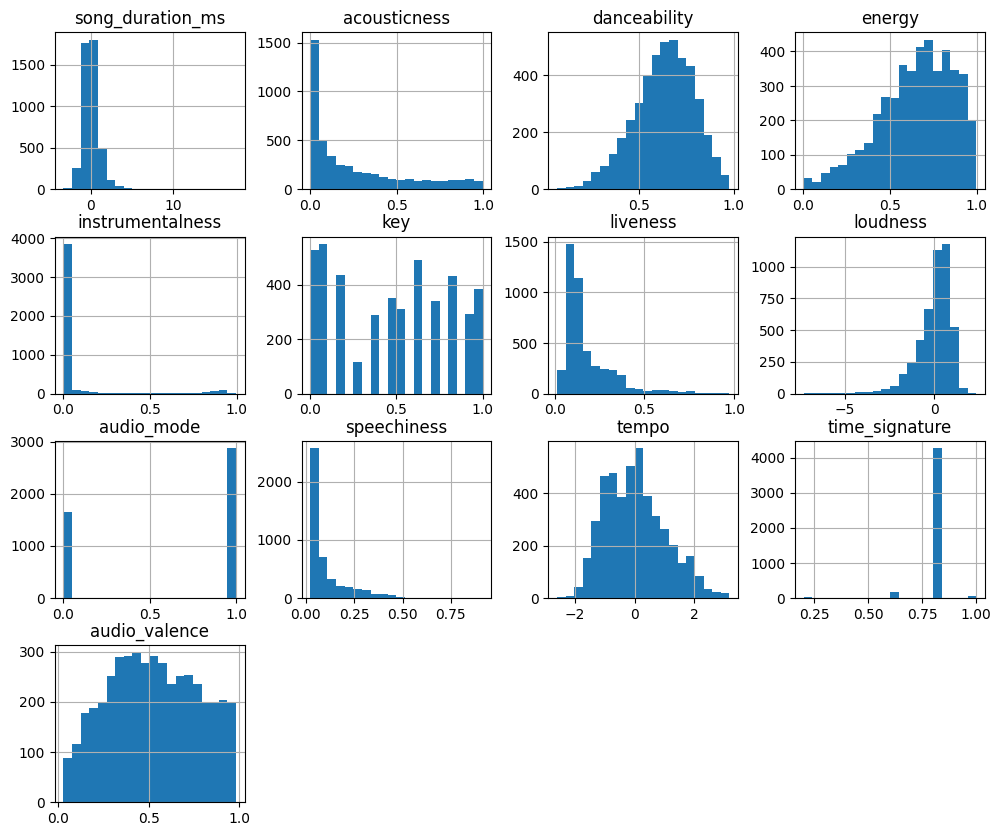

In [ ]:
Xvalidation.hist(figsize=(12, 10), bins=20)

<Axes: >

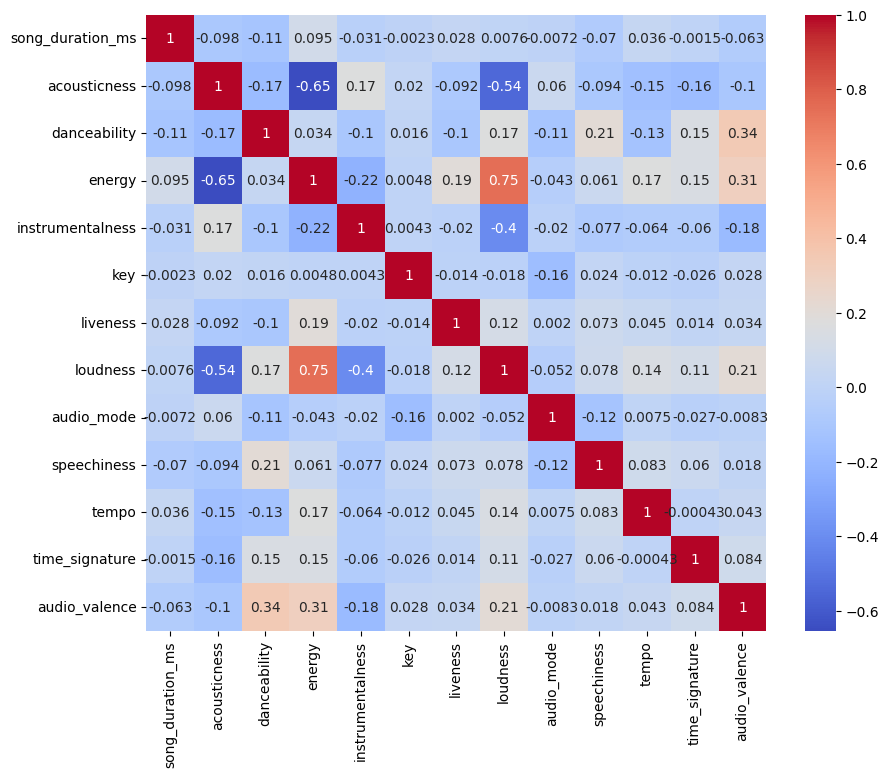

In [ ]:
correlation = Xvalidation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [ ]:
# Análise de multicolinearidade:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(Xvalidation.values, i) for i in range(Xvalidation.shape[1])]
vif["Feature"] = Xvalidation.columns
vif

,VIF,Feature
0,1.047744,song_duration_ms
1,3.102491,acousticness
2,23.366849,danceability
3,31.935736,energy
4,1.408147,instrumentalness
5,3.143310,key
6,2.721726,liveness
7,2.711157,loudness
8,2.836591,audio_mode
9,2.146657,speechiness


<Axes: >

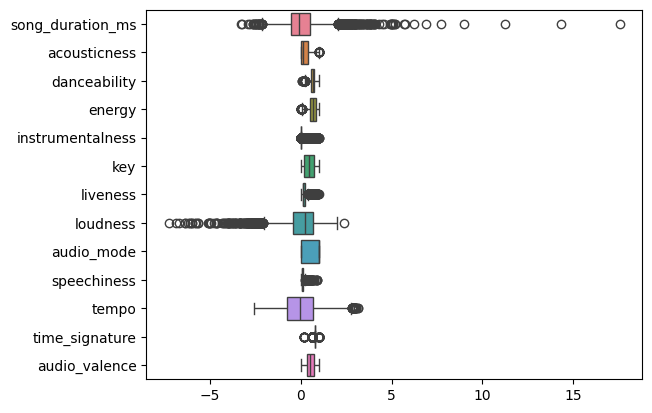

In [ ]:
sns.boxplot(data=Xvalidation, orient='h')

In [ ]:
scaler = StandardScaler()
Xvalidation_scaled = scaler.fit_transform(Xvalidation)


In [ ]:
# @title 2.3 IMPORTA O ARQUIVO y_validation

uploaded = files.upload()
yvalidation = pd.read_csv('y_val.csv', sep=',', encoding='utf-8')

Saving y_val.csv to y_val.csv


In [ ]:
yvalidation.describe()

,song_popularity
count,4521.000000
mean,53.028423
std,21.854456
min,0.100000
25%,40.000000
50%,56.000000
75%,69.000000
max,100.000000


<Axes: ylabel='Count'>

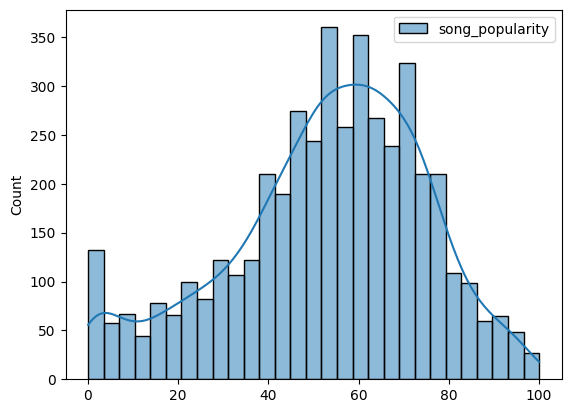

In [ ]:
sns.histplot(yvalidation, kde=True)

In [ ]:
# @title 2.4 IMPORTA O ARQUIVO X_test

uploaded = files.upload()
Xtest = pd.read_csv('X_test.csv', sep=',', encoding='utf-8')

Saving X_test.csv to X_test.csv


In [ ]:
Xtest.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000
mean,0.026829,0.258553,0.631432,0.641028,0.074751,0.477810,0.177946,-0.009692,0.622777,0.103130,-0.027278,0.792036,0.526013
std,1.106926,0.288297,0.158828,0.214247,0.216369,0.330017,0.143134,1.006936,0.484756,0.105142,0.998838,0.058846,0.243029
min,-3.140069,0.000002,0.059400,0.002050,0.000000,0.000000,0.014800,-8.163827,0.000000,0.023100,-2.330265,0.200000,0.023000
25%,-0.546488,0.021550,0.530000,0.502500,0.000000,0.181818,0.093100,-0.390215,0.000000,0.037400,-0.809650,0.800000,0.338500
50%,-0.104272,0.132000,0.640000,0.672000,0.000013,0.454545,0.121000,0.213049,1.000000,0.055500,-0.037404,0.800000,0.522000
75%,0.442776,0.420000,0.748000,0.810000,0.002300,0.727273,0.217000,0.657937,1.000000,0.121000,0.635009,0.800000,0.719000
max,27.360187,0.996000,0.975000,0.996000,0.975000,1.000000,0.986000,1.750409,1.000000,0.906000,3.064236,1.000000,0.984000


array([[<Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

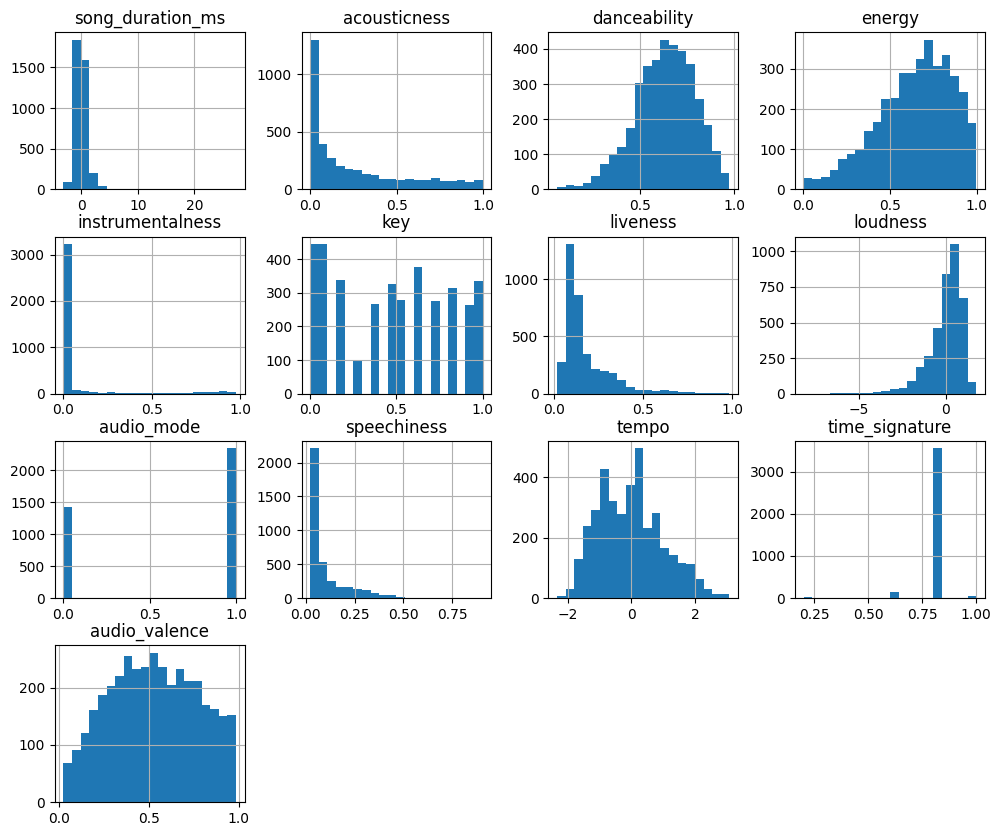

In [ ]:
Xtest.hist(figsize=(12, 10), bins=20)

<Axes: >

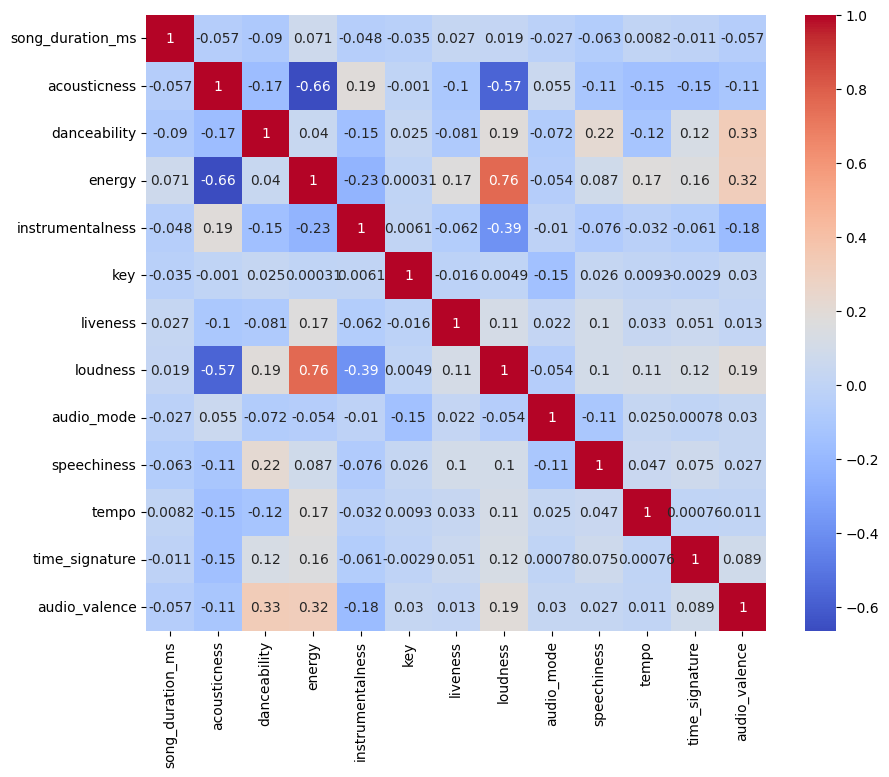

In [ ]:
correlation = Xtest.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [ ]:
#Análise de multicolinearidade

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(Xtest.values, i) for i in range(Xtest.shape[1])]
vif["Feature"] = Xtest.columns
vif

,VIF,Feature
0,1.030994,song_duration_ms
1,3.173106,acousticness
2,21.690947,danceability
3,32.620253,energy
4,1.385284,instrumentalness
5,3.136896,key
6,2.685490,liveness
7,2.791186,loudness
8,2.747633,audio_mode
9,2.152907,speechiness


<Axes: >

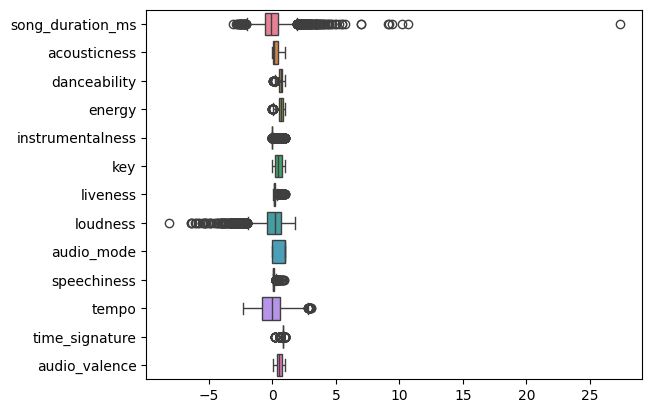

In [ ]:
sns.boxplot(data=Xtest, orient='h')

In [ ]:
scaler = StandardScaler()
Xtest_scaled = scaler.fit_transform(Xtest)

In [ ]:
# @title 2.5 IMPORTA O ARQUIVO y_test

uploaded = files.upload()
ytest = pd.read_csv('y_test.csv', sep=',', encoding='utf-8')

Saving y_test.csv to y_test.csv


In [ ]:
ytest.describe()

,song_popularity
count,3767.000000
mean,52.801009
std,22.068762
min,0.100000
25%,40.000000
50%,55.000000
75%,69.000000
max,100.000000


<Axes: ylabel='Count'>

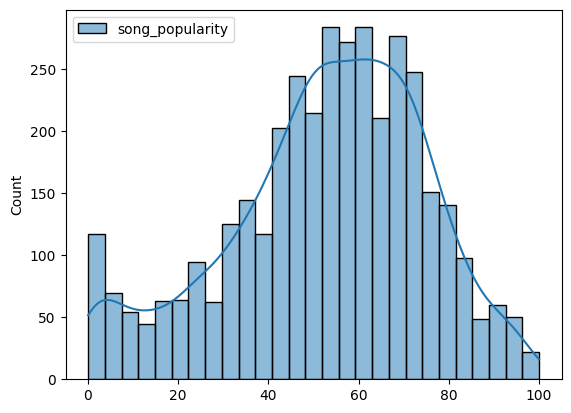

In [ ]:
sns.histplot(ytest, kde=True)

<Axes: xlabel='song_popularity'>

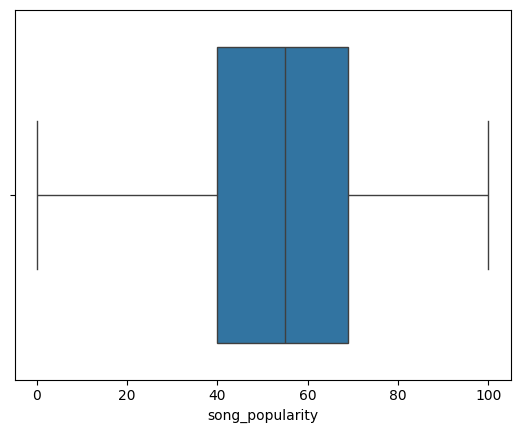

In [ ]:
sns.boxplot(x=ytest['song_popularity'])

## Training - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_training = LinearRegression()

lr_training = lr_training.fit(Xtraining_scaled, ytraining)

lr_y_pred_training = lr_training.predict(Xtraining_scaled)

lr_r2_training = mt.r2_score(ytraining, lr_y_pred_training)
lr_mse_training = mt.mean_squared_error(ytraining, lr_y_pred_training)
lr_rmse_training = np.sqrt(lr_mse_training)
lr_mae_training = mt.mean_absolute_error(ytraining, lr_y_pred_training)
lr_mape_training = mt.mean_absolute_percentage_error(ytraining, lr_y_pred_training)

print(f'R2: {lr_r2_training:.3f} \n MSE: {lr_mse_training:.3f} \n RMSE: {lr_rmse_training:.3f} \n MAE: {lr_mae_training:.3f} \n MAPE: {lr_mape_training:.3f}')

R2: 0.046 
 MSE: 455.996 
 RMSE: 21.354 
 MAE: 16.998 
 MAPE: 8.653


## Teste de Validação - Linear Regression

In [ ]:
lr_y_pred_val = lr_training.predict(Xvalidation_scaled)

lr_r2_val = mt.r2_score(yvalidation, lr_y_pred_val)
lr_mse_val = mt.mean_squared_error(yvalidation, lr_y_pred_val)
lr_rmse_val = np.sqrt(lr_mse_val)
lr_mae_val = mt.mean_absolute_error(yvalidation, lr_y_pred_val)
lr_mape_val = mt.mean_absolute_percentage_error(yvalidation, lr_y_pred_val)

print(f'R2: {lr_r2_val:.3f} \n MSE: {lr_mse_val:.3f} \n RMSE: {lr_rmse_val:.3f} \n MAE: {lr_mae_val:.3f} \n MAPE: {lr_mape_val:.3f}')

R2: 0.040 
 MSE: 458.429 
 RMSE: 21.411 
 MAE: 17.047 
 MAPE: 8.673


## Teste para produção - Linear Regression

In [ ]:
lr_last = LinearRegression()
lr_last = lr_last.fit( np.concatenate( (Xtraining_scaled, Xvalidation_scaled) ),
                       np.concatenate( (ytraining.to_numpy().ravel(), yvalidation.to_numpy().ravel()) ) )

# Classificação sobre os dados de teste
lr_y_pred_test = lr_last.predict( Xtest_scaled )

lr_r2_test = mt.r2_score(ytest, lr_y_pred_test)
lr_mse_test = mt.mean_squared_error(ytest, lr_y_pred_test)
lr_rmse_test = np.sqrt(lr_mse_test)
lr_mae_test = mt.mean_absolute_error(ytest, lr_y_pred_test)
lr_mape_test = mt.mean_absolute_percentage_error(ytest, lr_y_pred_test)

print(f'R2: {lr_r2_test:.3f} \n MSE {lr_mse_test:.3f} \n RMSE: {lr_rmse_test:.3f} \n MAE: {lr_mae_test:.3f} \n MAPE: {lr_mape_test:.3f}')

R2: 0.051 
 MSE 461.827 
 RMSE: 21.490 
 MAE: 17.147 
 MAPE: 8.514


## Training - Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr_training = DecisionTreeRegressor(random_state=0)

dtr_training = dtr_training.fit(Xtraining, ytraining)

dtr_y_pred_training = dtr_training.predict(Xtraining)

dtr_r2_training = mt.r2_score(ytraining, dtr_y_pred_training)
dtr_mse_training = mt.mean_squared_error(ytraining, dtr_y_pred_training)
dtr_rmse_training = np.sqrt(dtr_mse_training)
dtr_mae_training = mt.mean_absolute_error(ytraining, dtr_y_pred_training)
dtr_mape_training = mt.mean_absolute_percentage_error(ytraining, dtr_y_pred_training)

print(f'R2: {dtr_r2_training:.3f} \n MSE: {dtr_mse_training:.3f} \n RMSE: {dtr_rmse_training:.3f} \n MAE: {dtr_mae_training:.3f} \n MAPE: {dtr_mape_training:.3f}')

R2: 0.992 
 MSE: 3.940 
 RMSE: 1.985 
 MAE: 0.214 
 MAPE: 0.083


## Teste de Validação - Decision Tree Regressor

In [ ]:
dtr_y_pred_val = dtr_training.predict(Xvalidation)

print(f'R2: {mt.r2_score(yvalidation, dtr_y_pred_val)}')
print(f'MSE: {mt.mean_squared_error(yvalidation, dtr_y_pred_val)}')
print(f'RMSE: {np.sqrt(mt.mean_squared_error(yvalidation, dtr_y_pred_val))}')
print(f'MAE: {mt.mean_absolute_error(yvalidation, dtr_y_pred_val)}')
print(f'MAPE: {mt.mean_absolute_percentage_error(yvalidation, dtr_y_pred_val)}')
print('\n')

R2: -0.29710252907669754
MSE: 619.3815195322809
RMSE: 24.887376710539037
MAE: 17.09262742124056
MAPE: 7.105796254495554




In [ ]:
values = [i for i in range (1, 60)]
dtr_r2_scores = []
dtr_mse_scores = []
dtr_rmse_scores = []
dtr_mae_scores = []
dtr_mape_scores = []

for i in values:
  dtr_val = DecisionTreeRegressor(max_depth=i, random_state=0)
  dtr_val.fit(Xtraining, ytraining)

  dtr_y_pred_val2 = dtr_val.predict(Xvalidation)

  dtr_r2_scores.append(mt.r2_score(yvalidation, dtr_y_pred_val2))
  dtr_mse_scores.append(mt.mean_squared_error(yvalidation, dtr_y_pred_val2))
  dtr_rmse_scores.append(np.sqrt(mt.mean_squared_error(yvalidation, dtr_y_pred_val2)))
  dtr_mae_scores.append(mt.mean_absolute_error(yvalidation, dtr_y_pred_val2))
  dtr_mape_scores.append(mt.mean_absolute_percentage_error(yvalidation, dtr_y_pred_val2))

# Identificando o índice do melhor R²
best_r2_index = dtr_r2_scores.index(max(dtr_r2_scores))
best_depth = values[best_r2_index]

# Recuperando as métricas para o melhor max_depth
dtr_best_r2 = dtr_r2_scores[best_r2_index]
dtr_best_mse = dtr_mse_scores[best_r2_index]
dtr_best_rmse = dtr_rmse_scores[best_r2_index]
dtr_best_mae = dtr_mae_scores[best_r2_index]
dtr_best_mape = dtr_mape_scores[best_r2_index]

# Exibindo os resultados
print(f"Melhor nível de profundidade (max_depth): {best_depth}")
print(f"R²: {dtr_best_r2:.4f}")
print(f"MSE: {dtr_best_mse:.4f}")
print(f"RMSE: {dtr_best_rmse:.4f}")
print(f"MAE: {dtr_best_mae:.4f}")
print(f"MAPE: {dtr_best_mape:.4f}")


Melhor nível de profundidade (max_depth): 5
R²: 0.0636
MSE: 447.1613
RMSE: 21.1462
MAE: 16.8435
MAPE: 8.3958


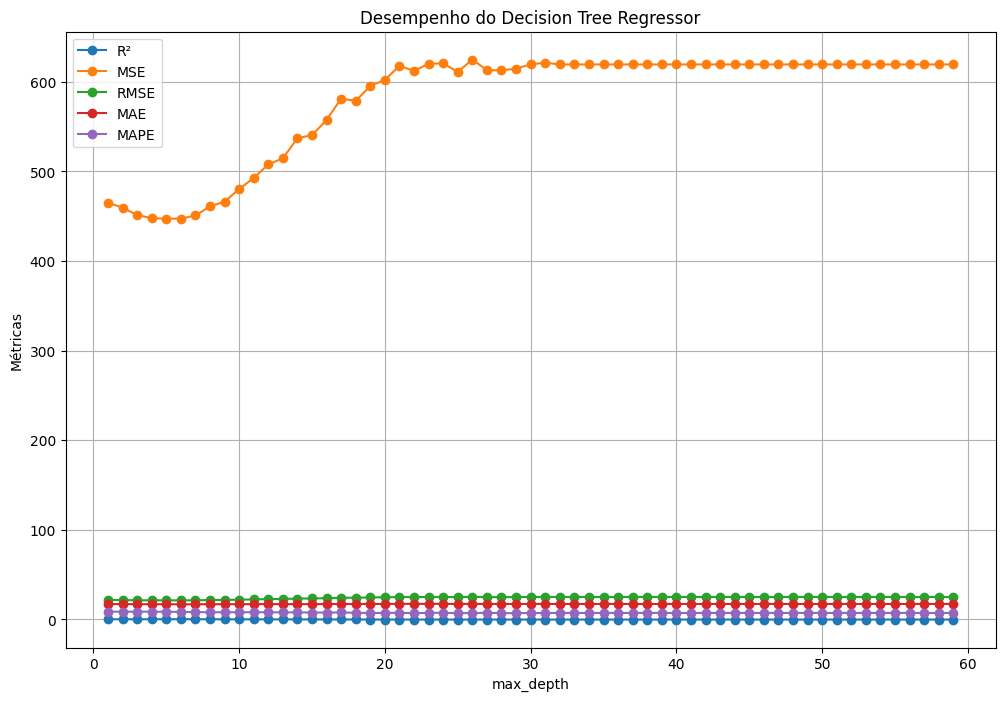

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(values, dtr_r2_scores, label="R²", marker='o')
plt.plot(values, dtr_mse_scores, label="MSE", marker='o')
plt.plot(values, dtr_rmse_scores, label="RMSE", marker='o')
plt.plot(values, dtr_mae_scores, label="MAE", marker='o')
plt.plot(values, dtr_mape_scores, label="MAPE", marker='o')

plt.xlabel("max_depth")
plt.ylabel("Métricas")
plt.title("Desempenho do Decision Tree Regressor")
plt.legend()
plt.grid()
plt.show()


## Teste para produção - Decision Tree Regressor

In [ ]:
dtr_last = DecisionTreeRegressor(max_depth=best_depth, random_state=0)
dtr_last = dtr_last.fit( np.concatenate( (Xtraining, Xvalidation) ),
                       np.concatenate( (ytraining.to_numpy().ravel(), yvalidation.to_numpy().ravel()) ) )

# Classificação sobre os dados de teste
dtr_y_pred_test = dtr_last.predict( Xtest )

dtr_r2_test = mt.r2_score(ytest, dtr_y_pred_test)
dtr_mse_test = mt.mean_squared_error(ytest, dtr_y_pred_test)
dtr_rmse_test = np.sqrt(dtr_mse_test)
dtr_mae_test = mt.mean_absolute_error(ytest, dtr_y_pred_test)
dtr_mape_test = mt.mean_absolute_percentage_error(ytest, dtr_y_pred_test)

print(f'R2: {dtr_r2_test:.3f} \n MSE {dtr_mse_test:.3f} \n RMSE: {dtr_rmse_test:.3f} \n MAE: {dtr_mae_test:.3f} \n MAPE: {dtr_mape_test:.3f}')

R2: 0.090 
 MSE 442.848 
 RMSE: 21.044 
 MAE: 16.830 
 MAPE: 7.883


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


## Training - Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_training = RandomForestRegressor(random_state=0)

rfr_training = rfr_training.fit(Xtraining, ytraining)

rfr_y_pred_training = rfr_training.predict(Xtraining)

rfr_r2_training = mt.r2_score(ytraining, rfr_y_pred_training)
rfr_mse_training = mt.mean_squared_error(ytraining, rfr_y_pred_training)
rfr_rmse_training = np.sqrt(rfr_mse_training)
rfr_mae_training = mt.mean_absolute_error(ytraining, rfr_y_pred_training)
rfr_mape_training = mt.mean_absolute_percentage_error(ytraining, rfr_y_pred_training)

print(f'R2: {rfr_r2_training:.3f} \n MSE: {rfr_mse_training:.3f} \n RMSE: {rfr_rmse_training:.3f} \n MAE: {rfr_mae_training:.3f} \n MAPE: {rfr_mape_training:.3f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2: 0.903 
 MSE: 46.455 
 RMSE: 6.816 
 MAE: 4.861 
 MAPE: 2.578


## Teste de Validação - Random Forest Regressor

In [ ]:
rfr_y_pred_val = rfr_training.predict(Xvalidation)

print(f'R2: {mt.r2_score(yvalidation, rfr_y_pred_val)}')
print(f'MSE: {mt.mean_squared_error(yvalidation, rfr_y_pred_val)}')
print(f'RMSE: {np.sqrt(mt.mean_squared_error(yvalidation, rfr_y_pred_val))}')
print(f'MAE: {mt.mean_absolute_error(yvalidation, rfr_y_pred_val)}')
print(f'MAPE: {mt.mean_absolute_percentage_error(yvalidation, rfr_y_pred_val)}')
print('\n')


R2: 0.33514028344793256
MSE: 317.47823497572665
RMSE: 17.817918929429627
MAE: 13.002222942656154
MAPE: 7.030919696789032




In [ ]:
# Valores a testar
n_estimators_values = [10, 50, 100, 150, 200]
max_depth_values = [5, 10, 15, 20, 25, None]

# Resultados
results = []

for n in n_estimators_values:
    for depth in max_depth_values:
        # Treinando o modelo
        rfr_val = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=0)
        rfr_val.fit(Xtraining, ytraining.to_numpy().ravel())

        # Avaliando nos dados de validação
        rfr_y_pred_val2 = rfr_val.predict(Xvalidation)

        r2 = mt.r2_score(yvalidation, rfr_y_pred_val2)
        mse = mt.mean_squared_error(yvalidation, rfr_y_pred_val2)
        rmse = np.sqrt(mse)
        mae = mt.mean_absolute_error(yvalidation, rfr_y_pred_val2)
        mape = mt.mean_absolute_percentage_error(yvalidation, rfr_y_pred_val2)

        # Registrando resultados
        results.append({
            "n_estimators": n,
            "max_depth": depth,
            "R2": r2,
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape
        })

# Convertendo para DataFrame para análise
import pandas as pd
results_df = pd.DataFrame(results)

# Exibindo os melhores resultados
best_result = results_df.loc[results_df['R2'].idxmax()]
print("Melhor combinação:")
print(best_result)

Melhor combinação:
n_estimators    200.000000
max_depth              NaN
R2                0.338307
MSE             315.966286
RMSE             17.775441
MAE              12.970989
MAPE              7.042790
Name: 29, dtype: float64


In [ ]:
rfr_best_r2 = best_result['R2']
rfr_best_mse = best_result['MSE']
rfr_best_rmse = best_result['RMSE']
rfr_best_mae = best_result['MAE']
rfr_best_mape = best_result['MAPE']

## Teste para produção - Random Forest Regressor

In [ ]:
rfr_last = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=0)

rfr_last = rfr_last.fit( np.concatenate( (Xtraining, Xvalidation) ),
                       np.concatenate( (ytraining.to_numpy().ravel(), yvalidation.to_numpy().ravel())))

rfr_y_pred_test = rfr_last.predict( Xtest )

rfr_r2_test = mt.r2_score(ytest, rfr_y_pred_test)
rfr_mse_test = mt.mean_squared_error(ytest, rfr_y_pred_test)
rfr_rmse_test = np.sqrt(rfr_mse_test)
rfr_mae_test = mt.mean_absolute_error(ytest, rfr_y_pred_test)
rfr_mape_test = mt.mean_absolute_percentage_error(ytest, rfr_y_pred_test)

print(f'R2: {rfr_r2_test:.3f} \n MSE {rfr_mse_test:.3f} \n RMSE: {rfr_rmse_test:.3f} \n MAE: {rfr_mae_test:.3f} \n MAPE: {rfr_mape_test:.3f}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


R2: 0.404 
 MSE 289.999 
 RMSE: 17.029 
 MAE: 12.227 
 MAPE: 6.341


## Training - Polinomial Regression

In [ ]:
from sklearn import preprocessing as pp
from sklearn import linear_model as lm

#Tranformando o DataFrame
poly_training = pp.PolynomialFeatures(degree=2)
X_poly_training = poly_training.fit_transform(Xtraining)

#Treino
pr_training = lm.LinearRegression()
pr_training.fit(X_poly_training, ytraining)

#Predição
poly_y_pred_training = pr_training.predict(X_poly_training)


#Metricas
pr_r2_training = mt.r2_score(ytraining, poly_y_pred_training)
pr_mse_training = mt.mean_squared_error(ytraining, poly_y_pred_training)
pr_rmse_training = np.sqrt(pr_mse_training)
pr_mae_training = mt.mean_absolute_error(ytraining, poly_y_pred_training)
pr_mape_training = mt.mean_absolute_percentage_error(ytraining, poly_y_pred_training)

print(f'R2: {pr_r2_training:.3f} \n MSE: {pr_mse_training:.3f} \n RMSE: {pr_rmse_training:.3f} \n MAE: {pr_mae_training:.3f} \n MAPE: {pr_mape_training:.3f}')

R2: 0.094 
 MSE: 432.986 
 RMSE: 20.808 
 MAE: 16.458 
 MAPE: 8.351


## Teste de Validação - Polinomial Regression

In [ ]:
X_poly_val = poly_training.fit_transform(Xvalidation)
poly_y_pred_val = pr_training.predict(X_poly_val)

print(f'R2: {mt.r2_score(yvalidation, poly_y_pred_val)}')
print(f'MSE: {mt.mean_squared_error(yvalidation, poly_y_pred_val)}')
print(f'RMSE: {np.sqrt(mt.mean_squared_error(yvalidation, poly_y_pred_val))}')
print(f'MAE: {mt.mean_absolute_error(yvalidation, poly_y_pred_val)}')
print(f'MAPE: {mt.mean_absolute_percentage_error(yvalidation, poly_y_pred_val)}')

R2: 0.06647668389711625
MSE: 445.7682234712756
RMSE: 21.113223900467585
MAE: 16.749939090484027
MAPE: 8.547931034605396


In [ ]:
# Resultados
results = []

for degree in range(1, 6):
    # Criando e ajustando PolynomialFeatures
    poly = pp.PolynomialFeatures(degree=degree)

    # Transformando o conjunto de treinamento
    X_poly_training = poly.fit_transform(Xtraining)

    # Treinando o modelo
    pr_val = lm.LinearRegression()
    pr_val.fit(X_poly_training, ytraining)

    # Transformando o conjunto de validação com o mesmo PolynomialFeatures
    X_poly_val = poly.transform(Xvalidation)

    # Predição
    poly_y_pred_val2 = pr_val.predict(X_poly_val)

    # Métricas
    r2 = mt.r2_score(yvalidation, poly_y_pred_val2)
    mse = mt.mean_squared_error(yvalidation, poly_y_pred_val2)
    rmse = np.sqrt(mse)
    mae = mt.mean_absolute_error(yvalidation, poly_y_pred_val2)
    mape = mt.mean_absolute_percentage_error(yvalidation, poly_y_pred_val2)

    # Registrando resultados
    results.append({
        "degree": degree,
        "R2": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape
    })

# Convertendo para DataFrame para análise
results_df = pd.DataFrame(results)

# Exibindo os melhores resultados
best_result = results_df.loc[results_df['R2'].idxmax()]
print("Melhor combinação:")
print(best_result)

# Exibindo todos os resultados
print(results_df)


Melhor combinação:
degree      2.000000
R2          0.066477
MSE       445.768223
RMSE       21.113224
MAE        16.749939
MAPE        8.547931
Name: 1, dtype: float64
   degree             R2           MSE          RMSE          MAE        MAPE
0       1       0.039925  4.584470e+02     21.411376    17.039754    8.682542
1       2       0.066477  4.457682e+02     21.113224    16.749939    8.547931
2       3      -0.047778  5.003263e+02     22.367974    17.087201    8.678283
3       4    -102.923632  4.962474e+04    222.766112    36.104220   10.184802
4       5 -224879.186852  1.073829e+08  10362.572100  1354.109260  346.300843


In [ ]:
results_df

,degree,R2,MSE,RMSE,MAE,MAPE
0,1,0.039925,4.584470e+02,21.411376,17.039754,8.682542
1,2,0.066477,4.457682e+02,21.113224,16.749939,8.547931
2,3,-0.047778,5.003263e+02,22.367974,17.087201,8.678283
3,4,-102.923632,4.962474e+04,222.766112,36.104220,10.184802
4,5,-224879.186852,1.073829e+08,10362.572100,1354.109260,346.300843


In [ ]:
pr_best_r2 = best_result['R2']
pr_best_mse = best_result['MSE']
pr_best_rmse = best_result['RMSE']
pr_best_mae = best_result['MAE']
pr_best_mape = best_result['MAPE']

## Teste para produção - Polinomial Regression

In [ ]:
# 4. Treinamento final com dados de treinamento + validação
X_train_val = pd.concat([Xtraining, Xvalidation], axis=0)
y_train_val = pd.concat([ytraining, yvalidation], axis=0)

poly = pp.PolynomialFeatures(degree=2)
X_train_val_poly = poly.fit_transform(X_train_val)

model = LinearRegression()
model.fit(X_train_val_poly, y_train_val)

# 5. Avaliação no conjunto de teste
pr_X_test_poly = poly.transform(Xtest)
pr_y_pred_test = model.predict(pr_X_test_poly)

pr_r2_test = mt.r2_score(ytest, pr_y_pred_test)
pr_mse_test = mt.mean_squared_error(ytest, pr_y_pred_test)
pr_rmse_test = np.sqrt(pr_mse_test)
pr_mae_test = mt.mean_absolute_error(ytest, pr_y_pred_test)
pr_mape_test = mt.mean_absolute_percentage_error(ytest, pr_y_pred_test)

print(f'R2: {pr_r2_test:.3f} \nMSE: {pr_mse_test:.3f} \nRMSE: {pr_rmse_test:.3f} \nMAE: {pr_mae_test:.3f} \nMAPE: {pr_mape_test:.3f}')

R2: 0.091 
MSE: 442.641 
RMSE: 21.039 
MAE: 16.736 
MAPE: 8.277


## Training - Linear Regression Lasso

In [ ]:
# Treinamento Lasso
lr_lasso_training = lm.Lasso(alpha=1.3, random_state=0)
lr_lasso_training.fit(Xtraining, ytraining)

# Predict
lasso_pred_training = lr_lasso_training.predict(Xtraining)

lr_lasso_r2_training = mt.r2_score(ytraining, lasso_pred_training)
lr_lasso_mse_training = mt.mean_squared_error(ytraining, lasso_pred_training)
lr_lasso_rmse_training = np.sqrt(lr_lasso_mse_training)
lr_lasso_mae_training = mt.mean_absolute_error(ytraining, lasso_pred_training)
lr_lasso_mape_training = mt.mean_absolute_percentage_error(ytraining, lasso_pred_training)

print(f'R2: {lr_lasso_r2_training:.3f} \n MSE: {lr_lasso_mse_training:.3f} \n RMSE: {lr_lasso_rmse_training:.3f} \n MAE: {lr_lasso_mae_training:.3f} \n MAPE: {lr_lasso_mape_training:.3f}')

R2: 0.006 
 MSE: 475.165 
 RMSE: 21.798 
 MAE: 17.314 
 MAPE: 8.738


## Teste de Validação - Linear Regression Lasso

In [ ]:
lasso_pred_val = lr_lasso_training.predict(Xvalidation)

print(f'R2: {mt.r2_score(yvalidation, lasso_pred_val)}')
print(f'MSE: {mt.mean_squared_error(yvalidation, lasso_pred_val)}')
print(f'RMSE: {np.sqrt(mt.mean_squared_error(yvalidation, lasso_pred_val))}')
print(f'MAE: {mt.mean_absolute_error(yvalidation, lasso_pred_val)}')
print(f'MAPE: {mt.mean_absolute_percentage_error(yvalidation, lasso_pred_val)}')

R2: 0.0062972843401136736
MSE: 474.5045855603148
RMSE: 21.783126165918308
MAE: 17.28150002402825
MAPE: 8.691141694874945


In [ ]:
alpha_values = [0.01, 0.05, 0.1, 0.5, 1, 10]
max_iter_values = [100, 250, 500, 1000, 1500, 2000]

best_r2 = -np.inf
best_params = {'alpha': None, 'max_iter': None}

results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
        lr_lasso_val = lm.Lasso(alpha=alpha, max_iter=max_iter, random_state=0)
        lr_lasso_val.fit(Xtraining, ytraining)

        lasso_pred_val2 = lr_lasso_val.predict(Xvalidation)

        r2 = mt.r2_score(yvalidation, lasso_pred_val2)
        mse = mt.mean_absolute_error(yvalidation, lasso_pred_val2)
        rmse = np.sqrt(mse)
        mae = mt.mean_absolute_error(yvalidation, lasso_pred_val2)
        mape = mt.mean_absolute_percentage_error(yvalidation, lasso_pred_val2)

        results.append({
            "Alpha": alpha,
            "Max_iter": max_iter,
            "R2": r2,
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape})


results_df = pd.DataFrame(results)
results_df.sort_values(by='R2', ascending=False)
results_df.reset_index(drop=True, inplace=True)

best_combination = results_df.iloc[0]
print('\nMelhores Parâmetros')
print(f'Alpha: {best_combination["Alpha"]}')
print(f'Max_iter: {best_combination["Max_iter"]}')
print(f'R2: {best_combination["R2"]:.3f}')
print(f'MSE: {best_combination["MSE"]:.3f}')
print(f'RMSE: {best_combination["RMSE"]:.3f}')
print(f'MAE: {best_combination["MAE"]:.3f}')
print(f'MAPE: {best_combination["MAPE"]:.3f}')


Melhores Parâmetros
Alpha: 0.01
Max_iter: 100.0
R2: 0.040
MSE: 17.038
RMSE: 4.128
MAE: 17.038
MAPE: 8.686


## Teste para produção - Linear Regression Lasso

In [ ]:
lr_lasso_test = lm.Lasso(alpha=0.01, max_iter=100, random_state=0)
#Treinamento
lr_lasso_test.fit(np.concatenate( (Xtraining, Xvalidation) ),
                 np.concatenate( (ytraining.to_numpy().ravel(), yvalidation.to_numpy().ravel()) ))

# Classificação sobre os dados de teste
lasso_pred_test = lr_lasso_test.predict(Xtest)

lr_lasso_r2_test = mt.r2_score(ytest, lasso_pred_test)
lr_lasso_mse_test = mt.mean_squared_error(ytest, lasso_pred_test)
lr_lasso_rmse_test = np.sqrt(lr_lasso_mse_test)
lr_lasso_mae_test = mt.mean_absolute_error(ytest, lasso_pred_test)
lr_lasso_mape_test = mt.mean_absolute_percentage_error(ytest, lasso_pred_test)

print(f'R2: {lr_lasso_r2_test:.3f} \nMSE: {lr_lasso_mse_test:.3f} \nRMSE: {lr_lasso_rmse_test:.3f} \nMAE: {lr_lasso_mae_test:.3f} \nMAPE: {lr_lasso_mape_test:.3f}')

R2: 0.051 
MSE: 462.167 
RMSE: 21.498 
MAE: 17.145 
MAPE: 8.549


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


## Training - Linear Regression Ridge

In [ ]:
# Treinamento Ridge
lr_ridge_training = lm.Ridge(alpha=1.3, random_state=0)
lr_ridge_training.fit(Xtraining, ytraining)

# Predict
ridge_pred_training = lr_ridge_training.predict(Xtraining)

lr_ridge_r2_training = mt.r2_score(ytraining, ridge_pred_training)
lr_ridge_mse_training = mt.mean_squared_error(ytraining, ridge_pred_training)
lr_ridge_rmse_training = np.sqrt(lr_ridge_mse_training)
lr_ridge_mae_training = mt.mean_absolute_error(ytraining, ridge_pred_training)
lr_ridge_mape_training = mt.mean_absolute_percentage_error(ytraining, ridge_pred_training)

print(f'R2: {lr_ridge_r2_training:.3f} \n MSE: {lr_ridge_mse_training:.3f} \n RMSE: {lr_ridge_rmse_training:.3f} \n MAE: {lr_ridge_mae_training:.3f} \n MAPE: {lr_ridge_mape_training:.3f}')

R2: 0.046 
 MSE: 455.997 
 RMSE: 21.354 
 MAE: 16.998 
 MAPE: 8.653


## Teste de Validação - Linear Regression Ridge

In [ ]:
ridge_pred_val = lr_ridge_training.predict(Xvalidation)

print(f'R2: {mt.r2_score(yvalidation, ridge_pred_val)}')
print(f'MSE: {mt.mean_squared_error(yvalidation, ridge_pred_val)}')
print(f'RMSE: {np.sqrt(mt.mean_squared_error(yvalidation, ridge_pred_val))}')
print(f'MAE: {mt.mean_absolute_error(yvalidation, ridge_pred_val)}')
print(f'MAPE: {mt.mean_absolute_percentage_error(yvalidation, ridge_pred_val)}')

R2: 0.03992899193355215
MSE: 458.445054654522
RMSE: 21.411330053374126
MAE: 17.039387259505197
MAPE: 8.682374091354726


In [ ]:
alpha_values = [0.01, 0.05, 0.1, 0.5, 1, 10]
max_iter_values = [100, 250, 500, 1000, 1500, 2000]

best_r2 = -np.inf
best_params = {'alpha': None, 'max_iter': None}

results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
      lr_ridge_val = lm.Ridge(alpha=alpha, max_iter=max_iter, random_state=0)
      lr_ridge_val.fit(Xtraining, ytraining)

      ridge_pred_val2 = lr_ridge_val.predict(Xvalidation)

      r2 = mt.r2_score(yvalidation, ridge_pred_val2)
      mse = mt.mean_squared_error(yvalidation, ridge_pred_val2)
      rmse = np.sqrt(mse)
      mae = mt.mean_absolute_error(yvalidation, ridge_pred_val2)
      mape = mt.mean_absolute_percentage_error(yvalidation, ridge_pred_val2)

      results.append({
          "Alpha": alpha,
          "Max_iter": max_iter,
          "R2": r2,
          "MSE": mse,
          "RMSE": rmse,
          "MAE": mae,
          "MAPE": mape})

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2', ascending=False)
results_df.reset_index(drop=True, inplace=True)

best_combination = results_df.iloc[0]
print('\nMelhores Parâmetros')
print(f'Alpha: {best_combination["Alpha"]}')
print(f'Max_iter: {best_combination["Max_iter"]}')
print(f'R2: {best_combination["R2"]:.3f}')
print(f'MSE: {best_combination["MSE"]:.3f}')
print(f'RMSE: {best_combination["RMSE"]:.3f}')
print(f'MAE: {best_combination["MAE"]:.3f}')
print(f'MAPE: {best_combination["MAPE"]:.3f}')


Melhores Parâmetros
Alpha: 0.01
Max_iter: 100.0
R2: 0.040
MSE: 458.447
RMSE: 21.411
MAE: 17.040
MAPE: 8.683


## Teste para produção - Linear Regression Ridge

In [ ]:
lr_ridge_test = lm.Ridge(alpha=0.01, max_iter=100, random_state=0)
#Treinamento
lr_ridge_test.fit(np.concatenate( (Xtraining, Xvalidation) ),
                       np.concatenate( (ytraining.to_numpy().ravel(), yvalidation.to_numpy().ravel()) ))

# Classificação sobre os dados de teste
ridge_pred_test = lr_ridge_test.predict(Xtest)

lr_ridge_r2_test = mt.r2_score(ytest, ridge_pred_test)
lr_ridge_mse_test = mt.mean_squared_error(ytest, ridge_pred_test)
lr_ridge_rmse_test = np.sqrt(lr_ridge_mse_test)
lr_ridge_mae_test = mt.mean_absolute_error(ytest, ridge_pred_test)
lr_ridge_mape_test = mt.mean_absolute_percentage_error(ytest, ridge_pred_test)

print(f'R2: {lr_ridge_r2_test:.3f}')
print(f'MSE: {lr_ridge_mse_test:.3f}')
print(f'RMSE: {lr_ridge_rmse_test:.3f}')
print(f'MAE: {lr_ridge_mae_test:.3f}')
print(f'MAPE: {lr_ridge_mape_test:.3f}')

R2: 0.051
MSE: 461.988
RMSE: 21.494
MAE: 17.144
MAPE: 8.531


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


## Training - Linear Regression Elastic Net

In [ ]:
# Treinamento Elastic Net
lr_elastic_training = lm.ElasticNet(alpha=1.3, random_state=0)
lr_elastic_training.fit(Xtraining, ytraining)

# Predict
elastic_pred_training = lr_elastic_training.predict(Xtraining)

lr_elastic_r2_training = mt.r2_score(ytraining, elastic_pred_training)
lr_elastic_mse_training = mt.mean_squared_error(ytraining, elastic_pred_training)
lr_elastic_rmse_training = np.sqrt(lr_elastic_mse_training)
lr_elastic_mae_training = mt.mean_absolute_error(ytraining, elastic_pred_training)
lr_elastic_mape_training = mt.mean_absolute_percentage_error(ytraining, elastic_pred_training)

print(f'R2: {lr_elastic_r2_training:.3f} \n MSE: {lr_elastic_mse_training:.3f} \n RMSE: {lr_elastic_rmse_training:.3f} \n MAE: {lr_elastic_mae_training:.3f} \n MAPE: {lr_elastic_mape_training:.3f}')

R2: 0.006 
 MSE: 474.931 
 RMSE: 21.793 
 MAE: 17.310 
 MAPE: 8.737


## Teste de Validação - Linear Regression Elastic Net

In [ ]:
elastic_pred_val = lr_elastic_training.predict(Xvalidation)

print(f'R2: {mt.r2_score(yvalidation, elastic_pred_val)}')
print(f'MSE: {mt.mean_squared_error(yvalidation, elastic_pred_val)}')
print(f'RMSE: {np.sqrt(mt.mean_squared_error(yvalidation, elastic_pred_val))}')
print(f'MAE: {mt.mean_absolute_error(yvalidation, elastic_pred_val)}')
print(f'MAPE: {mt.mean_absolute_percentage_error(yvalidation, elastic_pred_val)}')

R2: 0.006775184578125315
MSE: 474.27638264730746
RMSE: 21.777887469800817
MAE: 17.27660106686821
MAPE: 8.692007958450066


In [ ]:
alpha_values = [0.01, 0.05, 0.1, 0.5, 1, 10]
max_iter_values = [100, 250, 500, 1000, 1500, 2000]
l1_values = [0.2, 0.5, 0.8]

best_r2 = -np.inf
best_params = {'alpha': None, 'max_iter': None}

results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
        for l1 in l1_values:
            lr_elastic_val = lm.ElasticNet(alpha=alpha, max_iter=max_iter, l1_ratio=l1, random_state=0)

            lr_elastic_val.fit(Xtraining, ytraining)

            elastic_pred_val2 = lr_elastic_val.predict(Xvalidation)

            r2 = mt.r2_score(yvalidation, elastic_pred_val2)
            mse = mt.mean_squared_error(yvalidation, elastic_pred_val2)
            rmse = np.sqrt(mse)
            mae = mt.mean_absolute_error(yvalidation, elastic_pred_val2)
            mape = mt.mean_absolute_percentage_error(yvalidation, elastic_pred_val2)

            results.append({
                "Alpha": alpha,
                "Max_iter": max_iter,
                "L1_Ratio": l1,
                "R2": r2,
                "MSE": mse,
                "RMSE": rmse,
                "MAE": mae,
                "MAPE": mape})

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2', ascending=False)
results_df.reset_index(drop=True, inplace=True)

best_combination = results_df.iloc[0]
print('\nMelhores Parâmetros')
print(f'Alpha: {best_combination["Alpha"]}')
print(f'Max_iter: {best_combination["Max_iter"]}')
print(f'L1_Ratio: {best_combination["L1_Ratio"]}')
print(f'R2: {best_combination["R2"]:.3f}')
print(f'MSE: {best_combination["MSE"]:.3f}')
print(f'RMSE: {best_combination["RMSE"]:.3f}')
print(f'MAE: {best_combination["MAE"]:.3f}')
print(f'MAPE: {best_combination["MAPE"]:.3f}')


Melhores Parâmetros
Alpha: 0.01
Max_iter: 100.0
L1_Ratio: 0.2
R2: 0.039
MSE: 458.837
RMSE: 21.420
MAE: 17.034
MAPE: 8.676


## Teste para produção - Linear Elastic Net

In [ ]:
lr_elastic_test=lm.ElasticNet(alpha=0.01, max_iter=100, l1_ratio=0.2, random_state=0)
#Treinamento
lr_elastic_test.fit(np.concatenate( (Xtraining, Xvalidation) ),
                       np.concatenate( (ytraining.to_numpy().ravel(), yvalidation.to_numpy().ravel()) ))

# Classificação sobre os dados de teste
elastic_pred_test = lr_elastic_test.predict(Xtest)

lr_elastic_r2_test = mt.r2_score(ytest, elastic_pred_test)
lr_eslatic_mse_test = mt.mean_squared_error(ytest, elastic_pred_test)
lr_elastic_rmse_test = np.sqrt(lr_eslatic_mse_test)
lr_elastic_mae_test = mt.mean_absolute_error(ytest, elastic_pred_test)
lr_elastic_mape_test = mt.mean_absolute_percentage_error(ytest, elastic_pred_test)

print(f'R2: {lr_elastic_r2_test:.3f}')
print(f'MSE: {lr_eslatic_mse_test:.3f}')
print(f'RMSE: {lr_elastic_rmse_test:.3f}')
print(f'MAE: {lr_elastic_mae_test:.3f}')
print(f'MAPE: {lr_elastic_mape_test:.3f}')

R2: 0.048
MSE: 463.322
RMSE: 21.525
MAE: 17.152
MAPE: 8.582


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


## Training - Polinomial Regression Lasso

In [ ]:
#Tranformando o DataFrame
poly = pp.PolynomialFeatures(degree=2)
X_poly_training = poly.fit_transform(Xtraining)

#Treino
pr_lasso_training = lm.Lasso()
pr_lasso_training.fit(X_poly_training, ytraining)

#Predição
poly_y_pred_training = pr_lasso_training.predict(X_poly_training)


#Metricas
pr_lasso_r2_training = mt.r2_score(ytraining, poly_y_pred_training)
pr_lasso_mse_training = mt.mean_squared_error(ytraining, poly_y_pred_training)
pr_lasso_rmse_training = np.sqrt(pr_mse_training)
pr_lasso_mae_training = mt.mean_absolute_error(ytraining, poly_y_pred_training)
pr_lasso_mape_training = mt.mean_absolute_percentage_error(ytraining, poly_y_pred_training)

print(f'R2: {pr_r2_training:.3f} \n MSE: {pr_mse_training:.3f} \n RMSE: {pr_rmse_training:.3f} \n MAE: {pr_mae_training:.3f} \n MAPE: {pr_mape_training:.3f}')

R2: 0.094 
 MSE: 432.986 
 RMSE: 20.808 
 MAE: 16.458 
 MAPE: 8.351


## Teste de Validação - Polinomial Regression Lasso

In [ ]:
X_poly_val = poly.fit_transform(Xvalidation)
poly_y_pred_val = pr_lasso_training.predict(X_poly_val)

print(f'R2: {mt.r2_score(yvalidation, poly_y_pred_val)}')
print(f'MSE: {mt.mean_squared_error(yvalidation, poly_y_pred_val)}')
print(f'RMSE: {np.sqrt(mt.mean_squared_error(yvalidation, poly_y_pred_val))}')
print(f'MAE: {mt.mean_absolute_error(yvalidation, poly_y_pred_val)}')
print(f'MAPE: {mt.mean_absolute_percentage_error(yvalidation, poly_y_pred_val)}')

R2: 0.009631007774810185
MSE: 472.91269390919564
RMSE: 21.746555909136408
MAE: 17.238378728440562
MAPE: 8.681846557814456


In [ ]:
alpha_values = [0.01, 0.05, 0.1, 0.5, 1, 10]
max_iter_values = [100, 250, 500, 1000, 1500, 2000]

# Resultados
results = []

for degree in range(1, 6):
  for alpha in alpha_values:
    for max_iter in max_iter_values:
      # Criando e ajustando PolynomialFeatures
      poly = pp.PolynomialFeatures(degree=degree)

      # Transformando o conjunto de treinamento
      X_poly_training = poly.fit_transform(Xtraining)

      # Treinando o modelo
      pr_val = lm.Lasso(alpha=alpha, max_iter=max_iter, random_state=0)
      pr_val.fit(X_poly_training, ytraining)

      # Transformando o conjunto de validação com o mesmo PolynomialFeatures
      X_poly_val = poly.transform(Xvalidation)

      # Predição
      poly_y_pred_val2 = pr_val.predict(X_poly_val)

      # Métricas
      r2 = mt.r2_score(yvalidation, poly_y_pred_val2)
      mse = mt.mean_squared_error(yvalidation, poly_y_pred_val2)
      rmse = np.sqrt(mse)
      mae = mt.mean_absolute_error(yvalidation, poly_y_pred_val2)
      mape = mt.mean_absolute_percentage_error(yvalidation, poly_y_pred_val2)

      # Registrando resultados
      results.append({
          "degree": degree,
          "Alpha": alpha,
          "Max_iter": max_iter,
          "R2": r2,
          "MSE": mse,
          "RMSE": rmse,
          "MAE": mae,
          "MAPE": mape
      })

# Convertendo para DataFrame para análise
results_df = pd.DataFrame(results)

# Exibindo os melhores resultados
best_result = results_df.loc[results_df['R2'].idxmax()]
print("Melhor combinação:")
print(best_result)

# Exibindo todos os resultados
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.643e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.386e+03, tolerance: 5.042e

Melhor combinação:
degree        2.000000
Alpha         0.010000
Max_iter    250.000000
R2            0.068484
MSE         444.809765
RMSE         21.090514
MAE          16.732323
MAPE          8.591021
Name: 37, dtype: float64
     degree  Alpha  Max_iter        R2         MSE       RMSE        MAE  \
0         1   0.01       100  0.039928  458.445407  21.411338  17.038243   
1         1   0.01       250  0.039928  458.445407  21.411338  17.038243   
2         1   0.01       500  0.039928  458.445407  21.411338  17.038243   
3         1   0.01      1000  0.039928  458.445407  21.411338  17.038243   
4         1   0.01      1500  0.039928  458.445407  21.411338  17.038243   
..      ...    ...       ...       ...         ...        ...        ...   
175       5  10.00       250 -0.010468  482.510221  21.966115  17.374555   
176       5  10.00       500 -0.010991  482.760175  21.971804  17.370859   
177       5  10.00      1000 -0.011609  483.054807  21.978508  17.367946   
178       5 

In [ ]:
pr_lasso_best_r2 = best_result['R2']
pr_lasso_best_mse = best_result['MSE']
pr_lasso_best_rmse = best_result['RMSE']
pr_lasso_best_mae = best_result['MAE']
pr_lasso_best_mape = best_result['MAPE']

## Teste para produção - Polinomial Regression Lasso

In [ ]:
# Treinamento final com dados de treinamento + validação
X_train_val = pd.concat([Xtraining, Xvalidation], axis=0)
y_train_val = pd.concat([ytraining, yvalidation], axis=0)

poly = pp.PolynomialFeatures(degree=2)
X_train_val_poly = poly.fit_transform(X_train_val)

model = lm.Lasso(alpha=0.01, max_iter=250)
model.fit(X_train_val_poly, y_train_val)

# 5. Avaliação no conjunto de teste
pr_X_test_poly = poly.transform(Xtest)
pr_y_pred_test = model.predict(pr_X_test_poly)

pr_lasso_r2_test = mt.r2_score(ytest, pr_y_pred_test)
pr_lasso_mse_test = mt.mean_squared_error(ytest, pr_y_pred_test)
pr_lasso_rmse_test = np.sqrt(pr_lasso_mse_test)
pr_lasso_mae_test = mt.mean_absolute_error(ytest, pr_y_pred_test)
pr_lasso_mape_test = mt.mean_absolute_percentage_error(ytest, pr_y_pred_test)

print(f'R2: {pr_lasso_r2_test:.3f} \nMSE: {pr_lasso_mse_test:.3f} \nRMSE: {pr_lasso_rmse_test:.3f} \nMAE: {pr_lasso_mae_test:.3f} \nMAPE: {pr_lasso_mape_test:.3f}')

R2: 0.085 
MSE: 445.319 
RMSE: 21.103 
MAE: 16.786 
MAPE: 8.342


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.503e+05, tolerance: 7.200e+02
  model = cd_fast.enet_coordinate_descent(


## Training - Polinomial Regression Ridge

In [ ]:
#Tranformando o DataFrame
poly = pp.PolynomialFeatures(degree=2)
X_poly_training = poly.fit_transform(Xtraining)

#Treino
pr_ridge_training = lm.Ridge()
pr_ridge_training.fit(X_poly_training, ytraining)

#Predição
poly_y_pred_training = pr_ridge_training.predict(X_poly_training)


#Metricas
pr_ridge_r2_training = mt.r2_score(ytraining, poly_y_pred_training)
pr_ridge_mse_training = mt.mean_squared_error(ytraining, poly_y_pred_training)
pr_ridge_rmse_training = np.sqrt(pr_ridge_mse_training)
pr_ridge_mae_training = mt.mean_absolute_error(ytraining, poly_y_pred_training)
pr_ridge_mape_training = mt.mean_absolute_percentage_error(ytraining, poly_y_pred_training)

print(f'R2: {pr_ridge_r2_training:.3f} \n MSE: {pr_ridge_mse_training:.3f} \n RMSE: {pr_ridge_rmse_training:.3f} \n MAE: {pr_ridge_mae_training:.3f} \n MAPE: {pr_ridge_mape_training:.3f}')

R2: 0.009 
 MSE: 473.639 
 RMSE: 20.808 
 MAE: 17.285 
 MAPE: 8.700


## Teste de Validação - Polinomial Regression Ridge

In [ ]:
X_poly_val = poly.fit_transform(Xvalidation)
poly_y_pred_val = pr_ridge_training.predict(X_poly_val)

print(f'R2: {mt.r2_score(yvalidation, poly_y_pred_val)}')
print(f'MSE: {mt.mean_squared_error(yvalidation, poly_y_pred_val)}')
print(f'RMSE: {np.sqrt(mt.mean_squared_error(yvalidation, poly_y_pred_val))}')
print(f'MAE: {mt.mean_absolute_error(yvalidation, poly_y_pred_val)}')
print(f'MAPE: {mt.mean_absolute_percentage_error(yvalidation, poly_y_pred_val)}')

R2: 0.0676992996679171
MSE: 445.184410243757
RMSE: 21.09939359895817
MAE: 16.738740611690588
MAPE: 8.568992470935266


In [ ]:
alpha_values = [0.01, 0.05, 0.1, 0.5, 1, 10]
max_iter_values = [100, 250, 500, 1000, 1500, 2000]

# Resultados
results = []

for degree in range(1, 6):
  for alpha in alpha_values:
    for max_iter in max_iter_values:
      # Criando e ajustando PolynomialFeatures
      poly = pp.PolynomialFeatures(degree=degree)

      # Transformando o conjunto de treinamento
      X_poly_training = poly.fit_transform(Xtraining)

      # Treinando o modelo
      pr_val = lm.Ridge(alpha=alpha, max_iter=max_iter, random_state=0)
      pr_val.fit(X_poly_training, ytraining)

      # Transformando o conjunto de validação com o mesmo PolynomialFeatures
      X_poly_val = poly.transform(Xvalidation)

      # Predição
      poly_y_pred_val2 = pr_val.predict(X_poly_val)

      # Métricas
      r2 = mt.r2_score(yvalidation, poly_y_pred_val2)
      mse = mt.mean_squared_error(yvalidation, poly_y_pred_val2)
      rmse = np.sqrt(mse)
      mae = mt.mean_absolute_error(yvalidation, poly_y_pred_val2)
      mape = mt.mean_absolute_percentage_error(yvalidation, poly_y_pred_val2)

      # Registrando resultados
      results.append({
          "degree": degree,
          "Alpha": alpha,
          "Max_iter": max_iter,
          "R2": r2,
          "MSE": mse,
          "RMSE": rmse,
          "MAE": mae,
          "MAPE": mape
      })

# Convertendo para DataFrame para análise
results_df = pd.DataFrame(results)

# Exibindo os melhores resultados
best_result = results_df.loc[results_df['R2'].idxmax()]
print("Melhor combinação:")
print(best_result)

# Exibindo todos os resultados
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.00993e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.00993e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.00993e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.00993e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Melhor combinação:
degree        2.000000
Alpha         1.000000
Max_iter    100.000000
R2            0.067699
MSE         445.184410
RMSE         21.099394
MAE          16.738741
MAPE          8.568992
Name: 60, dtype: float64
     degree  Alpha  Max_iter         R2           MSE        RMSE        MAE  \
0         1   0.01       100   0.039925    458.447025   21.411376  17.039751   
1         1   0.01       250   0.039925    458.447025   21.411376  17.039751   
2         1   0.01       500   0.039925    458.447025   21.411376  17.039751   
3         1   0.01      1000   0.039925    458.447025   21.411376  17.039751   
4         1   0.01      1500   0.039925    458.447025   21.411376  17.039751   
..      ...    ...       ...        ...           ...         ...        ...   
175       5  10.00       250 -52.228249  25417.107096  159.427435  21.123643   
176       5  10.00       500 -52.228249  25417.107096  159.427435  21.123643   
177       5  10.00      1000 -52.228249  25417.10709

In [ ]:
pr_ridge_best_r2 = best_result['R2']
pr_ridge_best_mse = best_result['MSE']
pr_ridge_best_rmse = best_result['RMSE']
pr_ridge_best_mae = best_result['MAE']
pr_ridge_best_mape = best_result['MAPE']

## Teste para produção - Polinomial Regression Ridge

In [ ]:
# Treinamento final com dados de treinamento + validação
X_train_val = pd.concat([Xtraining, Xvalidation], axis=0)
y_train_val = pd.concat([ytraining, yvalidation], axis=0)

poly = pp.PolynomialFeatures(degree=2)
X_train_val_poly = poly.fit_transform(X_train_val)

model = lm.Lasso(alpha=1, max_iter=100)
model.fit(X_train_val_poly, y_train_val)

# Avaliação no conjunto de teste
pr_X_test_poly = poly.transform(Xtest)
pr_y_pred_test = model.predict(pr_X_test_poly)

pr_ridge_r2_test = mt.r2_score(ytest, pr_y_pred_test)
pr_ridge_mse_test = mt.mean_squared_error(ytest, pr_y_pred_test)
pr_ridge_rmse_test = np.sqrt(pr_ridge_mse_test)
pr_ridge_mae_test = mt.mean_absolute_error(ytest, pr_y_pred_test)
pr_ridge_mape_test = mt.mean_absolute_percentage_error(ytest, pr_y_pred_test)

print(f'R2: {pr_ridge_r2_test:.3f} \nMSE: {pr_ridge_mse_test:.3f} \nRMSE: {pr_ridge_rmse_test:.3f} \nMAE: {pr_ridge_mae_test:.3f} \nMAPE: {pr_ridge_mape_test:.3f}')

R2: 0.009 
MSE: 482.615 
RMSE: 21.968 
MAE: 17.456 
MAPE: 8.756


## Training - Polinomial Regression Elastic Net

In [ ]:
#Tranformando o DataFrame
poly = pp.PolynomialFeatures(degree=2)
X_poly_training = poly.fit_transform(Xtraining)

#Treino
pr_elastic_training = lm.ElasticNet()
pr_elastic_training.fit(X_poly_training, ytraining)

#Predição
poly_y_pred_training = pr_elastic_training.predict(X_poly_training)


#Metricas
pr_elastic_r2_training = mt.r2_score(ytraining, poly_y_pred_training)
pr_elastic_mse_training = mt.mean_squared_error(ytraining, poly_y_pred_training)
pr_elastic_rmse_training = np.sqrt(pr_elastic_mse_training)
pr_elastic_mae_training = mt.mean_absolute_error(ytraining, poly_y_pred_training)
pr_elastic_mape_training = mt.mean_absolute_percentage_error(ytraining, poly_y_pred_training)

print(f'R2: {pr_elastic_r2_training:.3f} \n MSE: {pr_elastic_mse_training:.3f} \n RMSE: {pr_elastic_rmse_training:.3f} \n MAE: {pr_elastic_mae_training:.3f} \n MAPE: {pr_elastic_mape_training:.3f}')

R2: 0.013 
 MSE: 471.878 
 RMSE: 21.723 
 MAE: 17.244 
 MAPE: 8.679


## Teste de Validação - Polinomial Regression Elastic Net

In [ ]:
X_poly_val = poly.fit_transform(Xvalidation)
poly_y_pred_val = pr_elastic_training.predict(X_poly_val)

print(f'R2: {mt.r2_score(yvalidation, poly_y_pred_val)}')
print(f'MSE: {mt.mean_squared_error(yvalidation, poly_y_pred_val)}')
print(f'RMSE: {np.sqrt(mt.mean_squared_error(yvalidation, poly_y_pred_val))}')
print(f'MAE: {mt.mean_absolute_error(yvalidation, poly_y_pred_val)}')
print(f'MAPE: {mt.mean_absolute_percentage_error(yvalidation, poly_y_pred_val)}')

R2: 0.012781775822342856
MSE: 471.4081655799173
RMSE: 21.711936016392396
MAE: 17.19996619878308
MAPE: 8.675108462242978


In [ ]:
alpha_values = [0.01, 0.05, 0.1, 0.5, 1, 10]
max_iter_values = [100, 250, 500, 1000, 1500, 2000]
l1_values = [0.2, 0.5, 0.8]

# Resultados
results = []

for degree in range(1, 5):
  for alpha in alpha_values:
    for max_iter in max_iter_values:
      for l1 in l1_values:
        # Criando e ajustando PolynomialFeatures
        poly = pp.PolynomialFeatures(degree=degree)

        # Transformando o conjunto de treinamento
        X_poly_training = poly.fit_transform(Xtraining)

        # Treinando o modelo
        pr_val = lm.ElasticNet(alpha=alpha, max_iter=max_iter, l1_ratio=l1, random_state=0)
        pr_val.fit(X_poly_training, ytraining)

        # Transformando o conjunto de validação com o mesmo PolynomialFeatures
        X_poly_val = poly.transform(Xvalidation)

        # Predição
        poly_y_pred_val2 = pr_val.predict(X_poly_val)

        # Métricas
        r2 = mt.r2_score(yvalidation, poly_y_pred_val2)
        mse = mt.mean_squared_error(yvalidation, poly_y_pred_val2)
        rmse = np.sqrt(mse)
        mae = mt.mean_absolute_error(yvalidation, poly_y_pred_val2)
        mape = mt.mean_absolute_percentage_error(yvalidation, poly_y_pred_val2)

        # Registrando resultados
        results.append({
            "degree": degree,
            "Alpha": alpha,
            "Max_iter": max_iter,
            "l1_Ration": l1,
            "R2": r2,
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape
        })

# Convertendo para DataFrame para análise
results_df = pd.DataFrame(results)

# Exibindo os melhores resultados
best_result = results_df.loc[results_df['R2'].idxmax()]
print("Melhor combinação:")
print(best_result)

# Exibindo todos os resultados
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.792e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.564e+05, tolerance: 5.042e

Melhor combinação:
degree         2.000000
Alpha          0.010000
Max_iter     100.000000
l1_Ration      0.800000
R2             0.066289
MSE          445.858010
RMSE          21.115350
MAE           16.756022
MAPE           8.623978
Name: 110, dtype: float64
     degree  Alpha  Max_iter  l1_Ration        R2         MSE       RMSE  \
0         1   0.01       100        0.2  0.039109  458.836504  21.420469   
1         1   0.01       100        0.5  0.039538  458.631708  21.415688   
2         1   0.01       100        0.8  0.039833  458.491012  21.412403   
3         1   0.01       250        0.2  0.039109  458.836504  21.420469   
4         1   0.01       250        0.5  0.039538  458.631708  21.415688   
..      ...    ...       ...        ...       ...         ...        ...   
427       4  10.00      1500        0.5 -0.009512  482.053924  21.955726   
428       4  10.00      1500        0.8 -0.006973  480.841338  21.928095   
429       4  10.00      2000        0.2  0.002555  476.

In [ ]:
pr_elastic_best_r2 = best_result['R2']
pr_elastic_best_mse = best_result['MSE']
pr_elastic_best_rmse = best_result['RMSE']
pr_elastic_best_mae = best_result['MAE']
pr_elastic_best_mape = best_result['MAPE']

## Teste para produção - Polinomial Regression Elastic Net

In [ ]:
# Treinamento final com dados de treinamento + validação
X_train_val = pd.concat([Xtraining, Xvalidation], axis=0)
y_train_val = pd.concat([ytraining, yvalidation], axis=0)

poly = pp.PolynomialFeatures(degree=2)
X_train_val_poly = poly.fit_transform(X_train_val)

model = lm.ElasticNet(alpha=0.01, max_iter=100, l1_ratio=0.80)
model.fit(X_train_val_poly, y_train_val)

# Avaliação no conjunto de teste
pr_X_test_poly = poly.transform(Xtest)
pr_y_pred_test = model.predict(pr_X_test_poly)

pr_elastic_r2_test = mt.r2_score(ytest, pr_y_pred_test)
pr_elastic_mse_test = mt.mean_squared_error(ytest, pr_y_pred_test)
pr_elastic_rmse_test = np.sqrt(pr_elastic_mse_test)
pr_elastic_mae_test = mt.mean_absolute_error(ytest, pr_y_pred_test)
pr_elastic_mape_test = mt.mean_absolute_percentage_error(ytest, pr_y_pred_test)

print(f'R2: {pr_elastic_r2_test:.3f} \nMSE: {pr_elastic_mse_test:.3f} \nRMSE: {pr_elastic_rmse_test:.3f} \nMAE: {pr_elastic_mae_test:.3f} \nMAPE: {pr_elastic_mape_test:.3f}')

R2: 0.081 
MSE: 447.335 
RMSE: 21.150 
MAE: 16.824 
MAPE: 8.370


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.282e+06, tolerance: 7.200e+02
  model = cd_fast.enet_coordinate_descent(
